In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from typing import Literal

# Data Cleaning

In [37]:
def read_and_plot_data(root_dir):
    period_data = {}  # Dictionary to hold data for each period
    files = {}
    
    for period in os.listdir(root_dir):
        period_path = os.path.join(root_dir, period)
        if os.path.isdir(period_path):  # Check if it's a directory
            period_path = os.path.join(period_path, period)
            for folder in os.listdir(period_path):

                folder_path = os.path.join(period_path, folder)
                if os.path.isdir(folder_path):
                    for file in os.listdir(folder_path):
                        if "__" in file and file.endswith(".csv"):  # Check for '__{letter}' files
                            file_path = os.path.join(folder_path, file)
                            # Read the CSV data
                            data = pd.read_csv(file_path)
                            period_data[(folder, period)] = data
                            
                            if period not in files:
                                files[period] = []

                            files[period].append(file_path)

    return period_data, files

def plot_price_and_volume_together(period_data):
    """
    Plot price and volume over time for each period on the same chart.
    
    Args:
        period_data (dict): A dictionary where keys are period names and 
                            values are DataFrames with 'price', 'volume', and 'timestamp' columns.
    """
    for (stock, period), data in period_data.items():
        if data is not None:
            # Convert 'timestamp' column to a datetime format for proper plotting
            data['timestamp'] = pd.to_datetime(data['timestamp'], format='%H:%M:%S.%f')
            
            # Create a plot with price and volume
            fig, ax1 = plt.subplots(figsize=(12, 6))
            
            # Plot price on the primary y-axis
            ax1.plot(data['timestamp'], data['price'], label='Price', color='blue', linewidth=2)
            ax1.set_xlabel("Timestamp")
            ax1.set_ylabel("Price", color='blue')
            ax1.tick_params(axis='y', labelcolor='blue')
            
            # Create a secondary y-axis for volume
            ax2 = ax1.twinx()
            ax2.bar(data['timestamp'], data['volume'], label='Volume', color='orange', alpha=0.6, width=0.0001)
            ax2.set_ylabel("Volume", color='orange')
            ax2.tick_params(axis='y', labelcolor='orange')
            
            # Add a title and grid
            plt.title(f"Price and Volume of Stock {stock} over Time for {period}")
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No data available for {period}.")

def concat_numbered_files_all(root_dir):
    """
    Concatenate CSV files with numbered names for all stock letters across all periods into a single DataFrame per stock letter.

    Args:
        root_dir (str): The root directory where the TrainingData folder resides.

    Returns:
        dict: A dictionary where keys are stock letters and values are concatenated DataFrames across all periods.
              Example: { "A": DataFrame, "C": DataFrame, ... }
    """
    combined_data = {}  # Dictionary to hold data for all stock letters across all periods
    column_names = ["bidVolume","bidPrice","askVolume","askPrice","timestamp"]

    # Iterate through periods
    for period in os.listdir(root_dir):
        period_path = os.path.join(root_dir, period, period)  # Navigate to the period subfolder
        if os.path.isdir(period_path):
            # Iterate through stock letters in the current period
            for stock_letter in os.listdir(period_path):
                stock_path = os.path.join(period_path, stock_letter)
                if os.path.isdir(stock_path):
                    # Find all numbered files and sort them
                    numbered_files = sorted(
                        [f for f in os.listdir(stock_path) if f.startswith(f"market_data_{stock_letter}_") and f.endswith(".csv")],
                        key=lambda x: int(x.split("_")[-1].split(".")[0])  # Extract the number from the filename
                    )

                    # Concatenate all numbered files for the stock letter
                    dataframes = []
                    for i, file in enumerate(numbered_files):

                        file_path = os.path.join(stock_path, file)
                        if i != 0:
                            df = pd.read_csv(file_path, names=column_names, header=None)
                        else:
                            df = pd.read_csv(file_path)

                        dataframes.append(df)

                    # Concatenate all DataFrames for the stock letter across periods
                    if dataframes:
                        combined_df = pd.concat(dataframes, ignore_index=True)
                        # print(combined_df, stock_letter)
                        # break
                        combined_data[(stock_letter, period)] = combined_df

    return combined_data

def save_combined_data_to_csv(combined_data, output_folder):
    """
    Save the combined data dictionary to CSV files in a specified folder.

    Args:
        combined_data (dict): A dictionary where keys are stock letters and values are concatenated DataFrames.
        output_folder (str): Path to the folder where CSV files will be saved.
    """
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    for (stock_letter, period), df in combined_data.items():
        output_path = os.path.join(output_folder, f"../TrainingData/{period}/{period}/{stock_letter}/{stock_letter}_{period}_combined_market_data.csv")
        df.to_csv(output_path, index=False)  # Save DataFrame to CSV
        print(f"Saved {stock_letter} market data to {output_path}")


In [ ]:
plot_price_and_volume_together(read_and_plot_data("../TrainingData")[0])

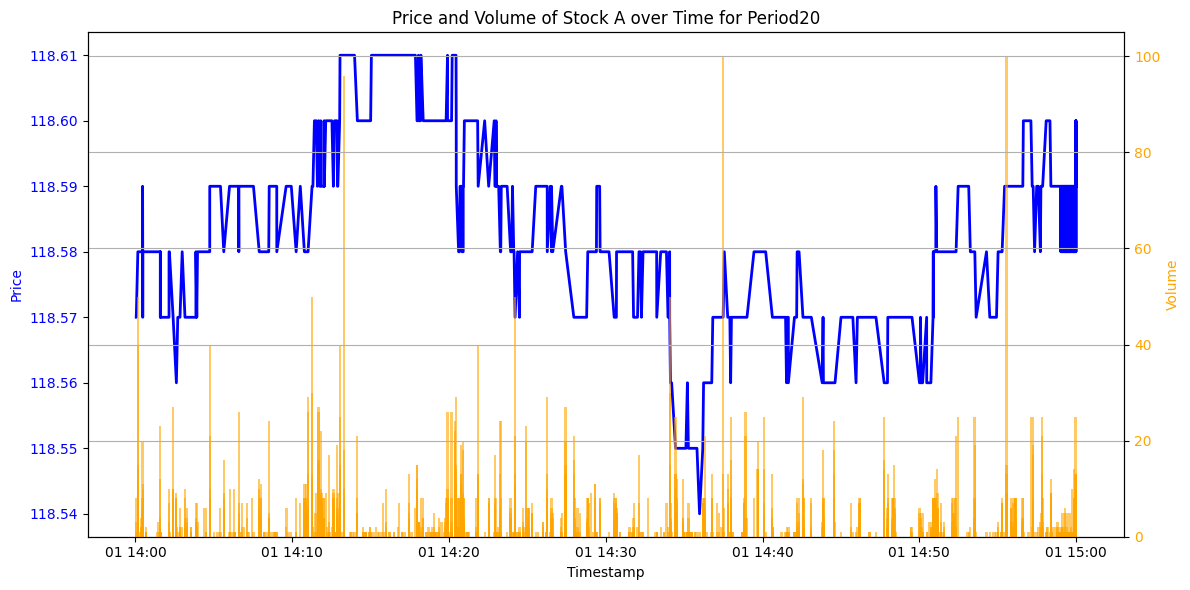

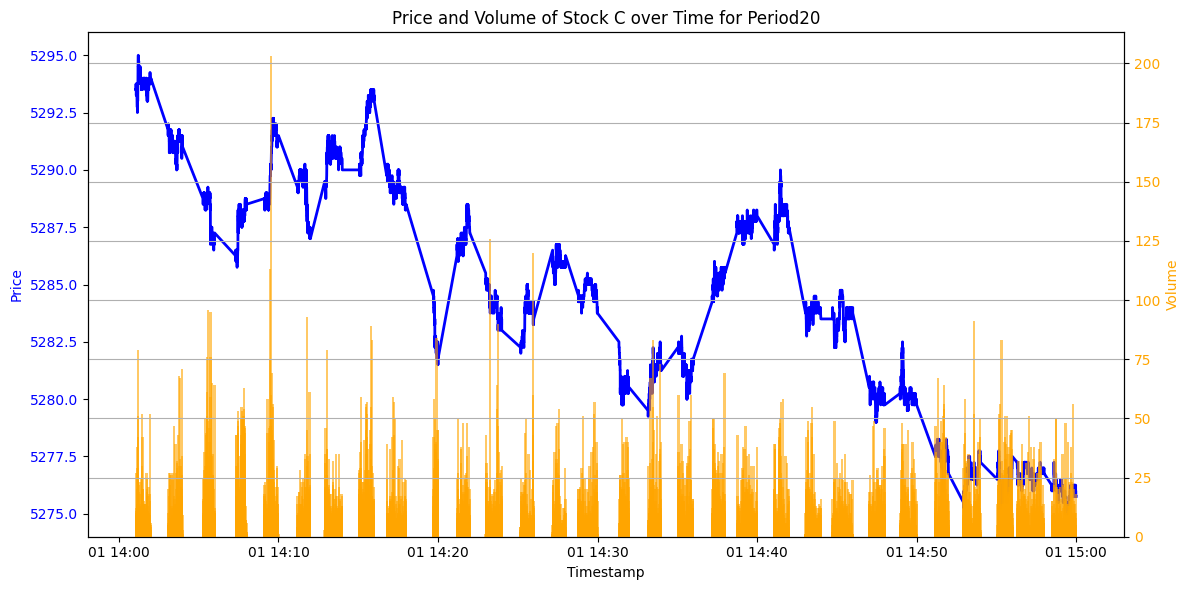

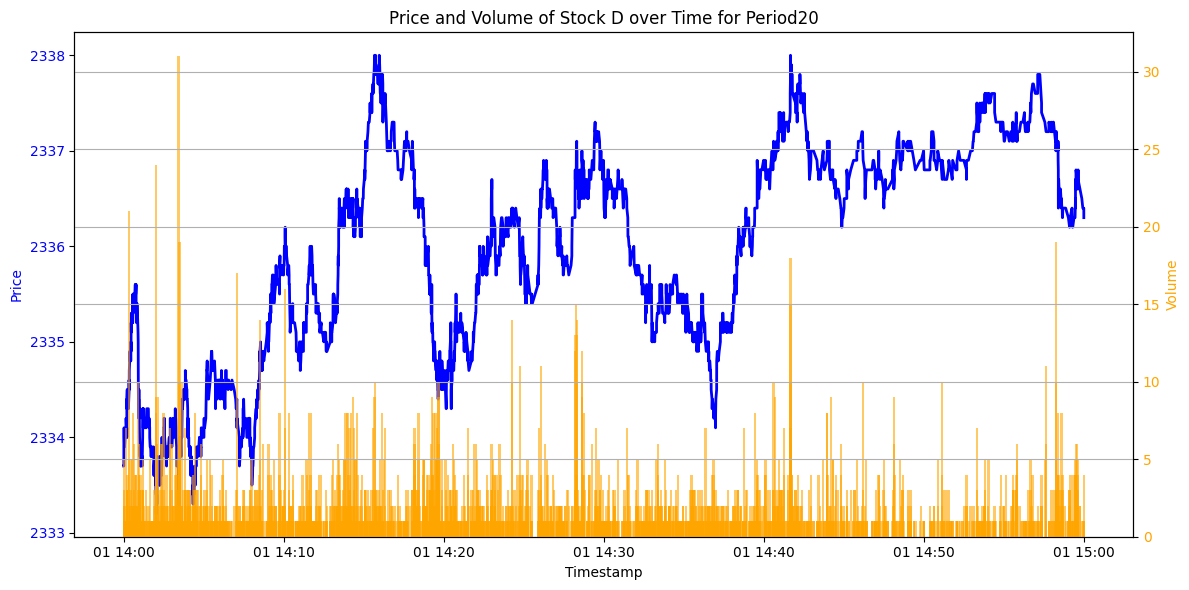

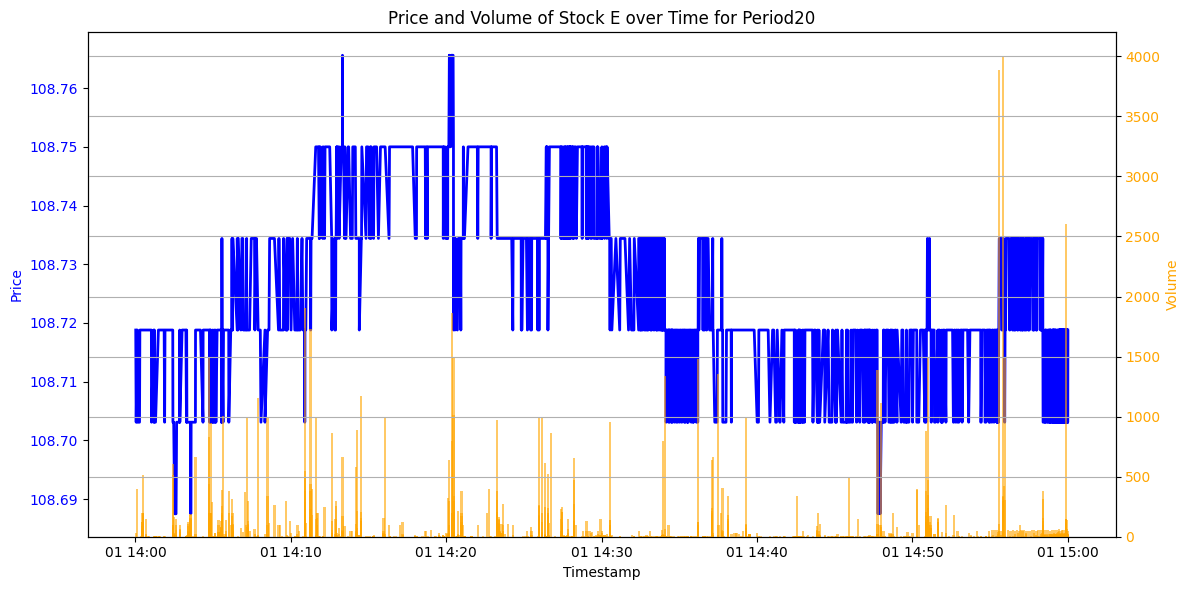

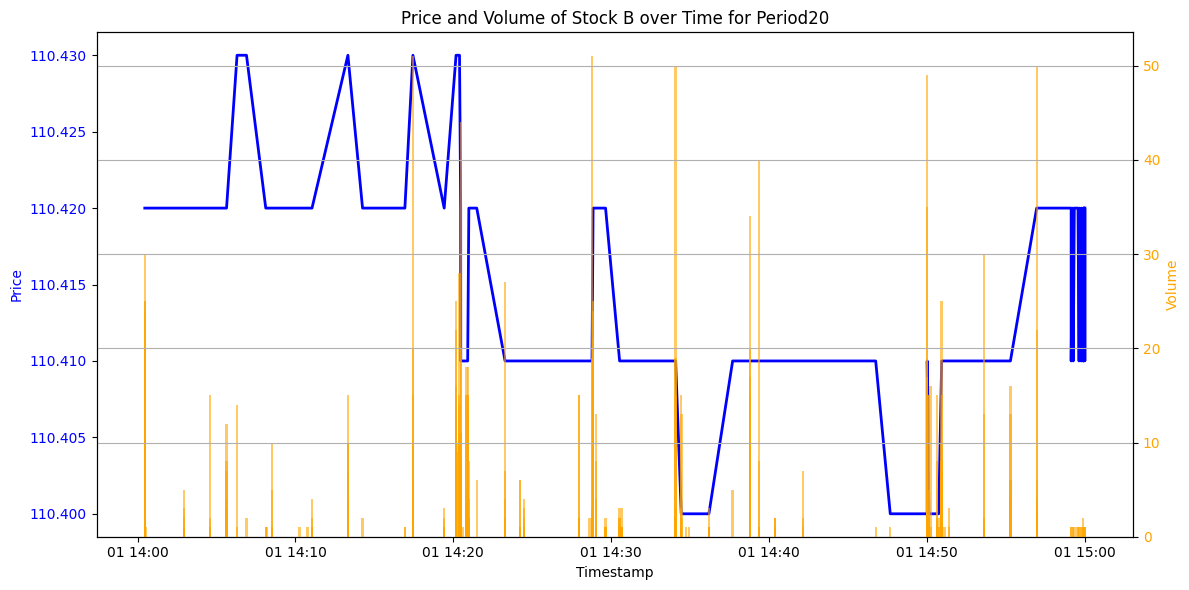

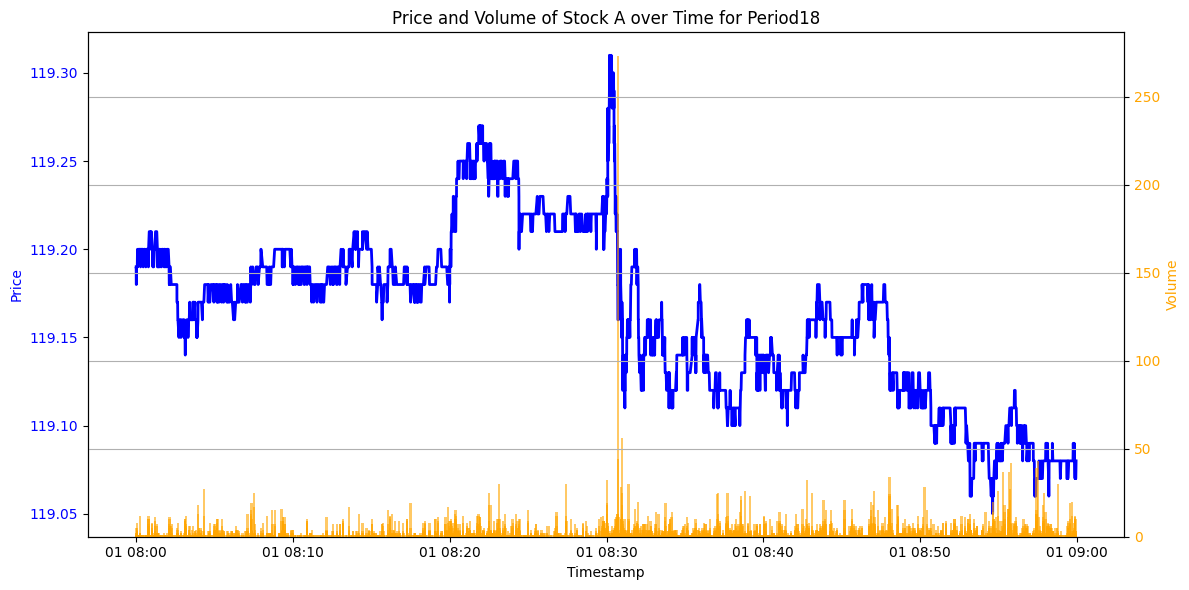

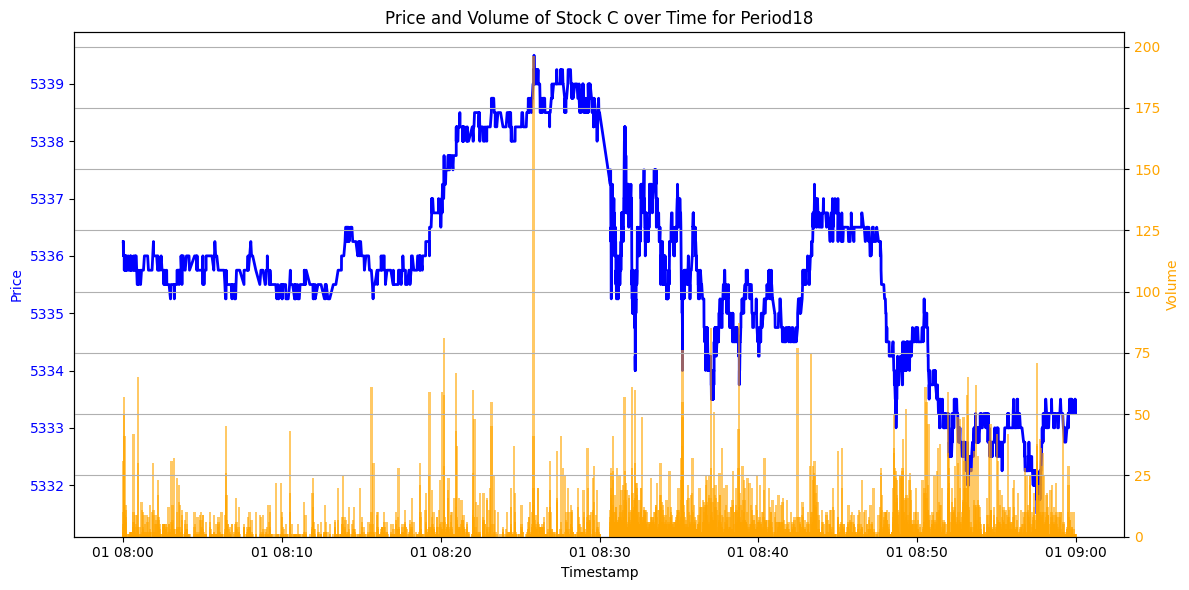

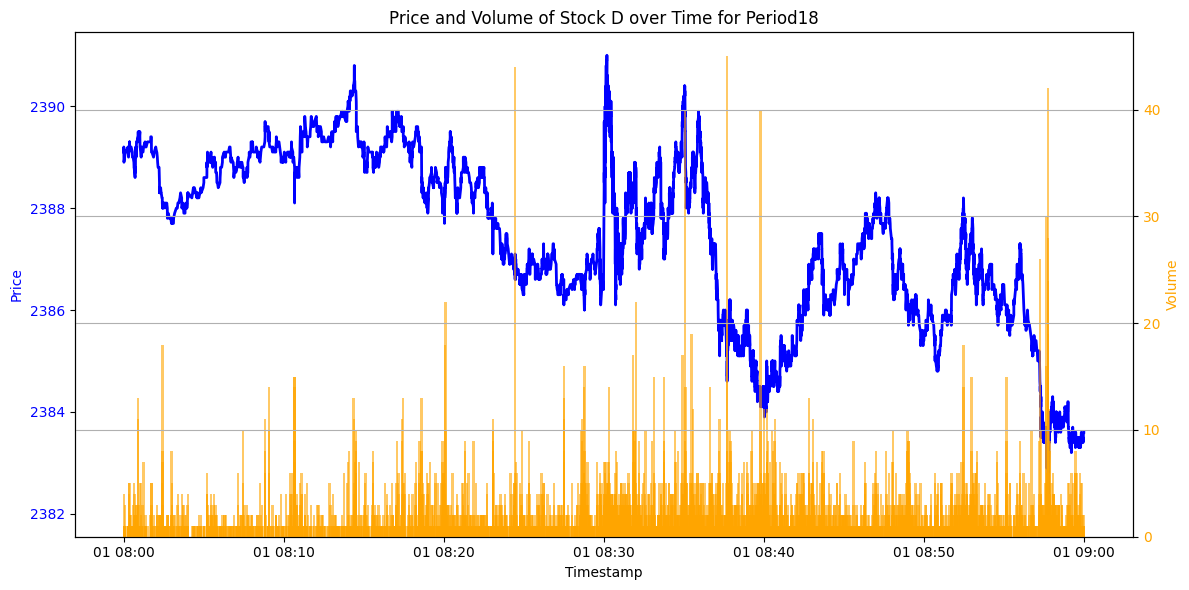

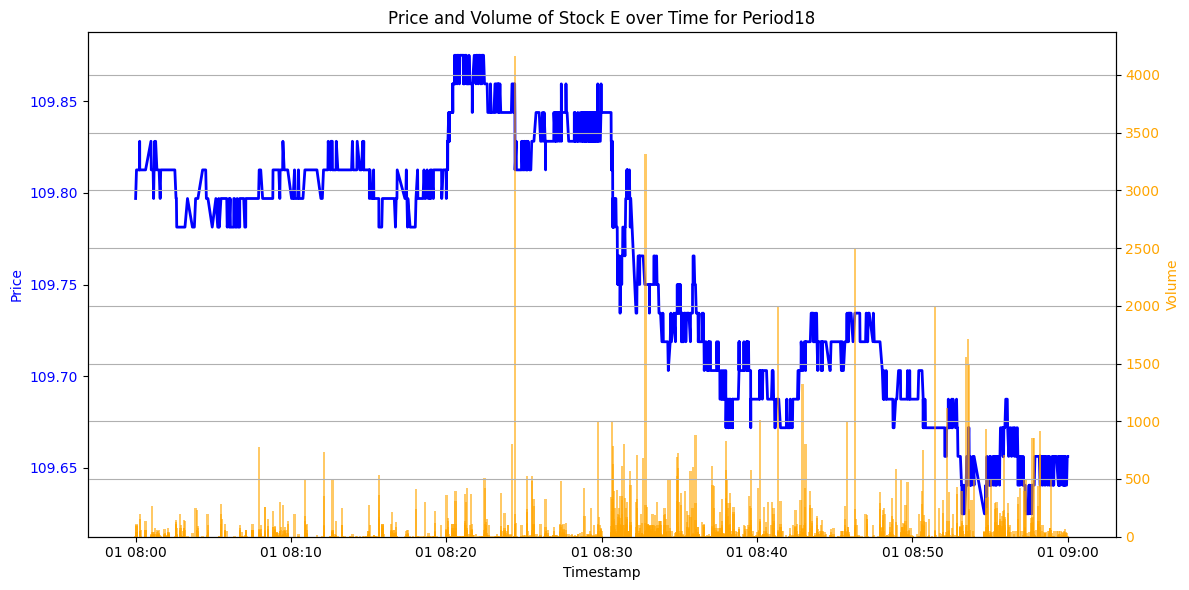

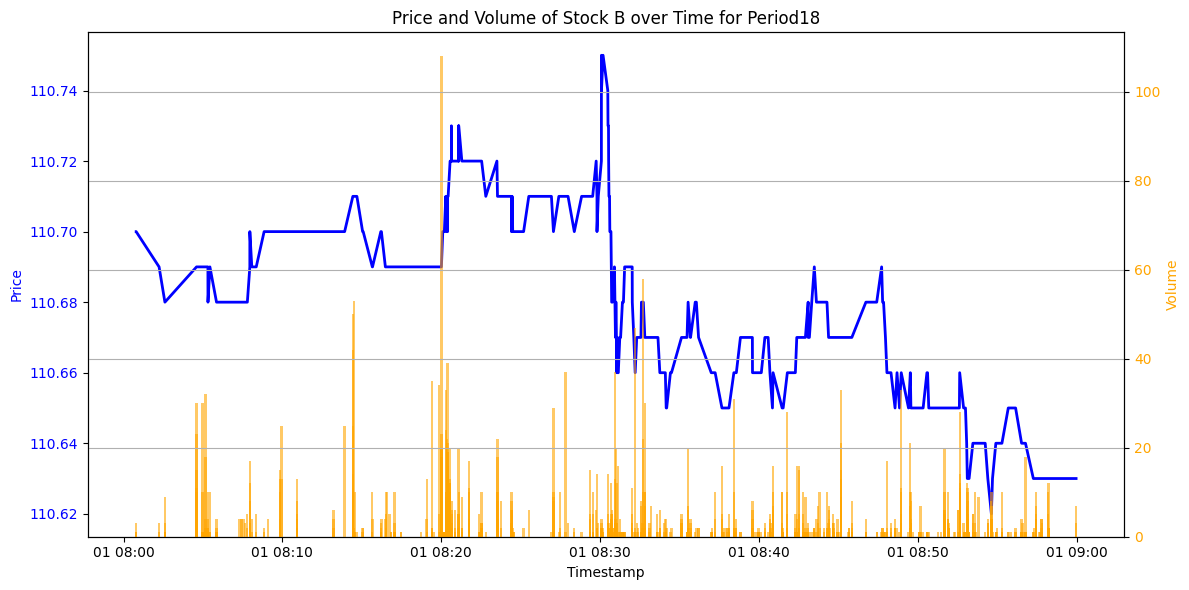

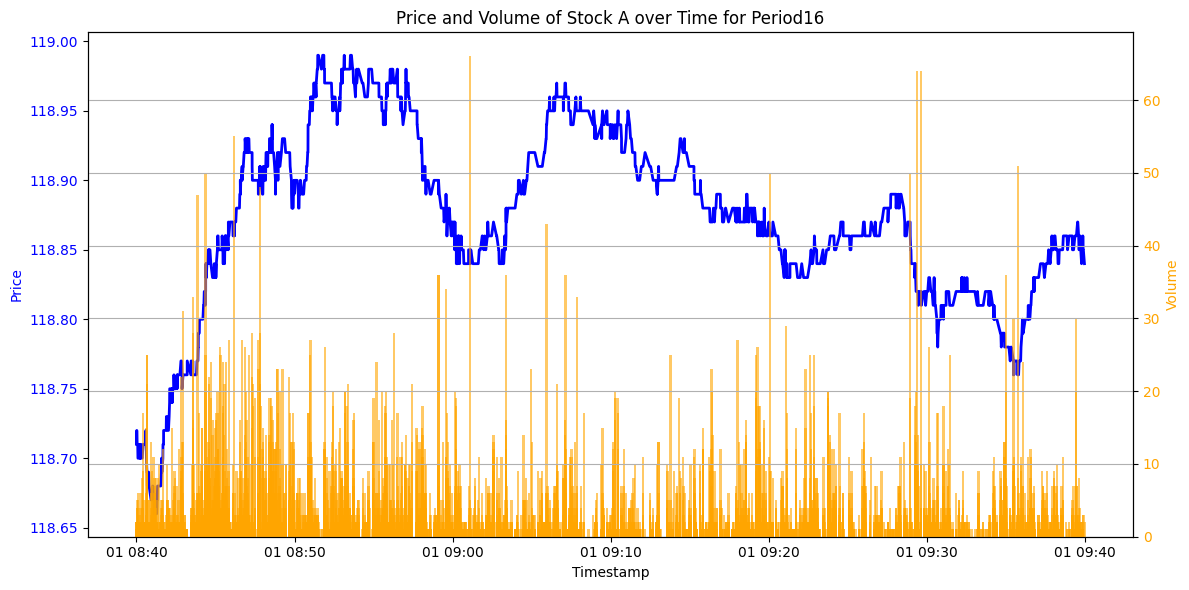

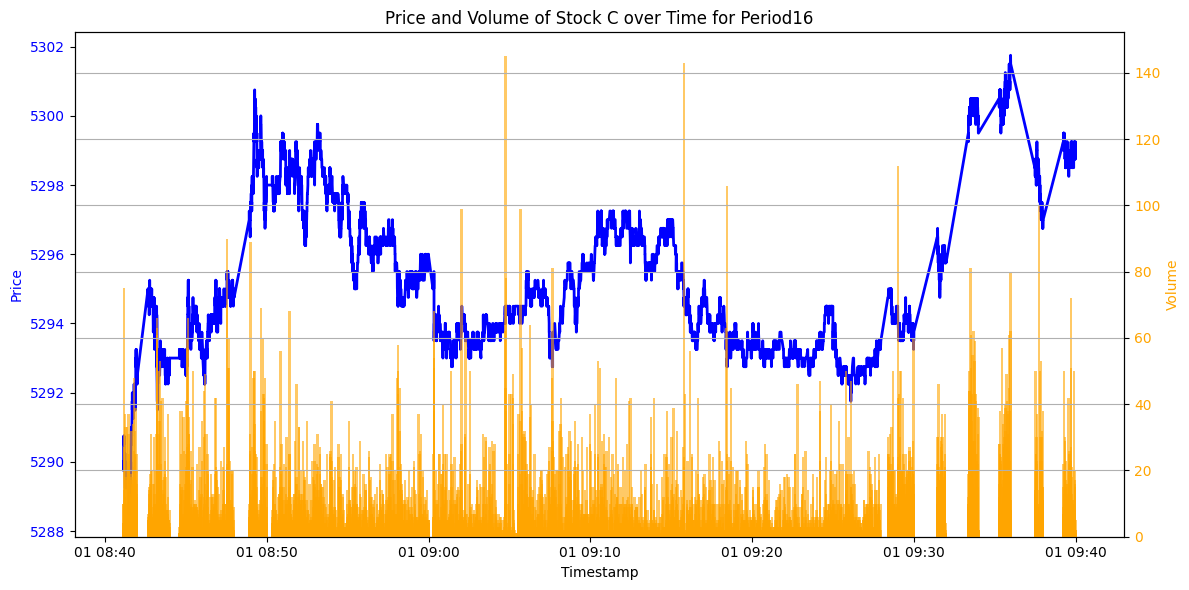

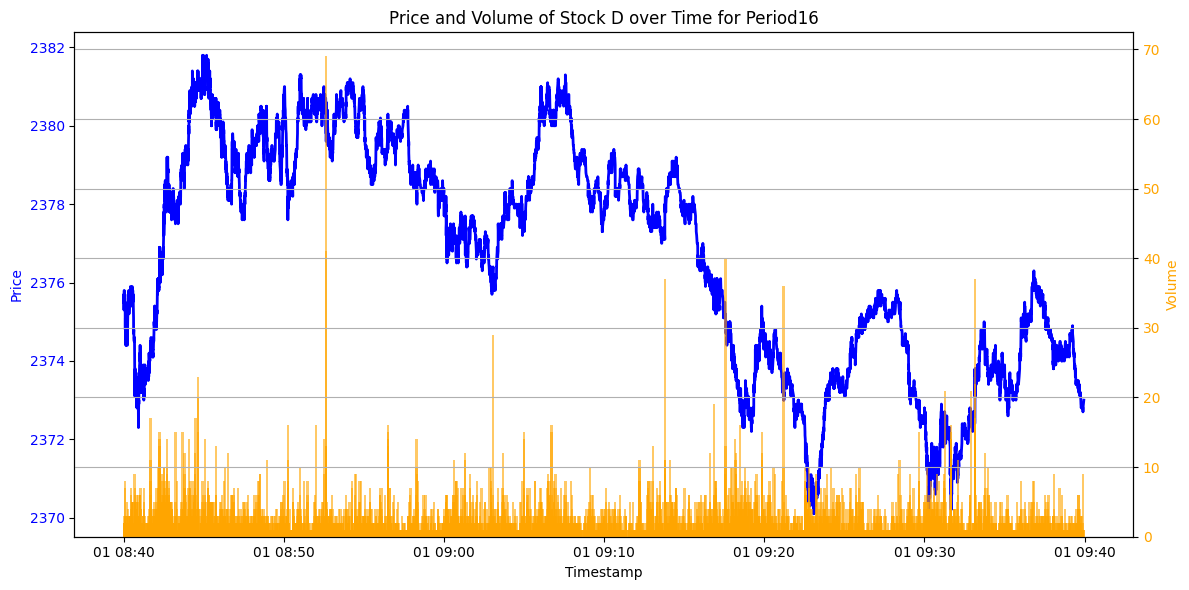

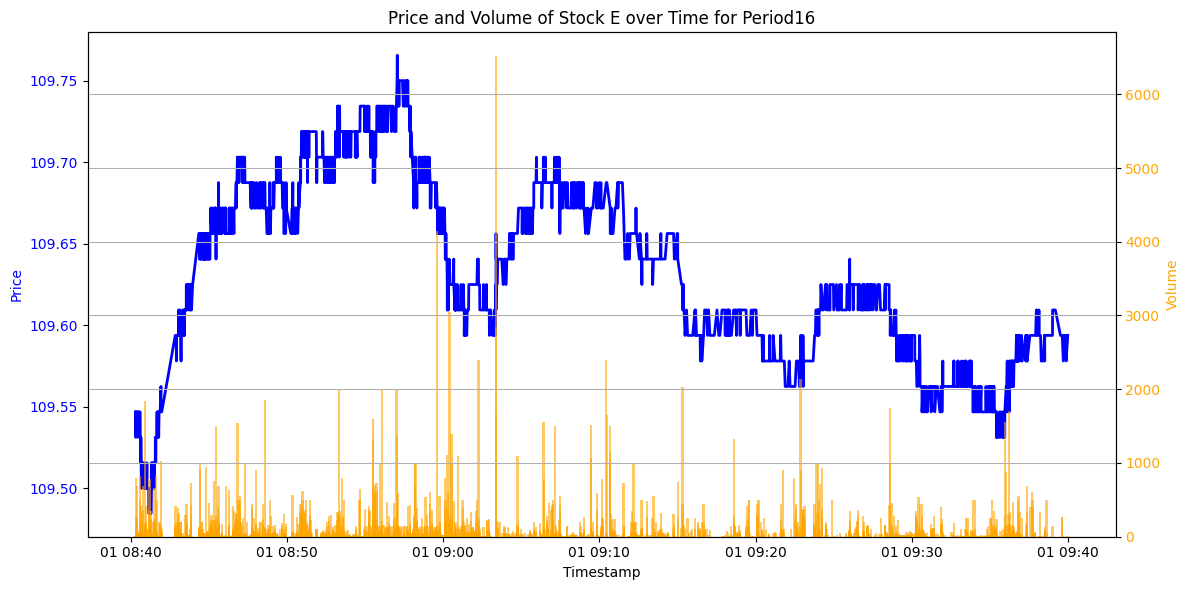

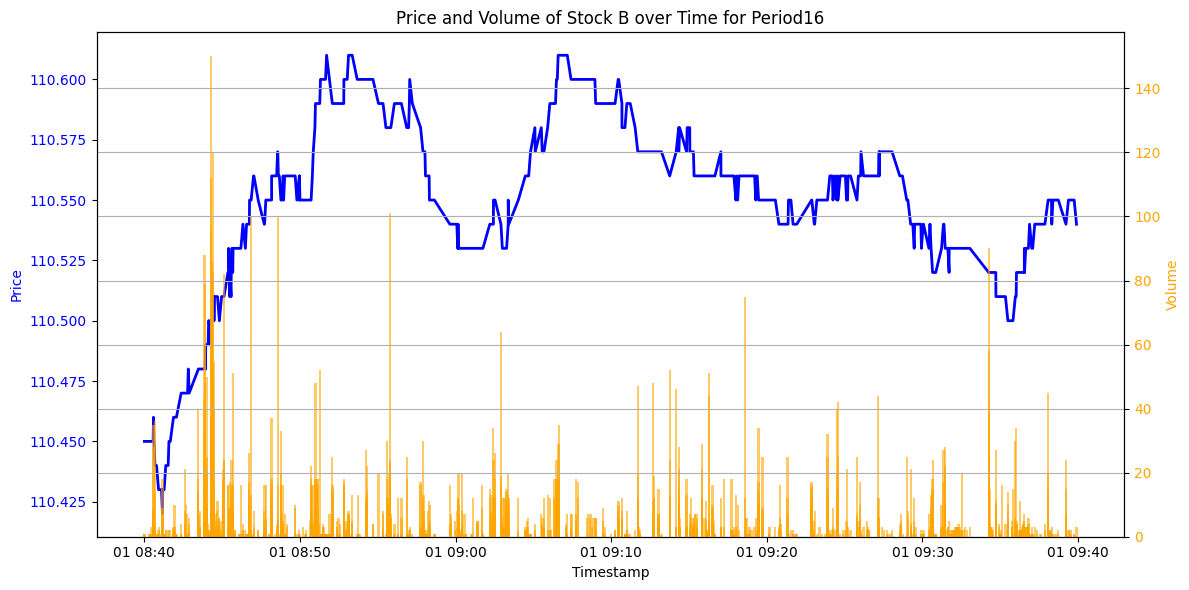

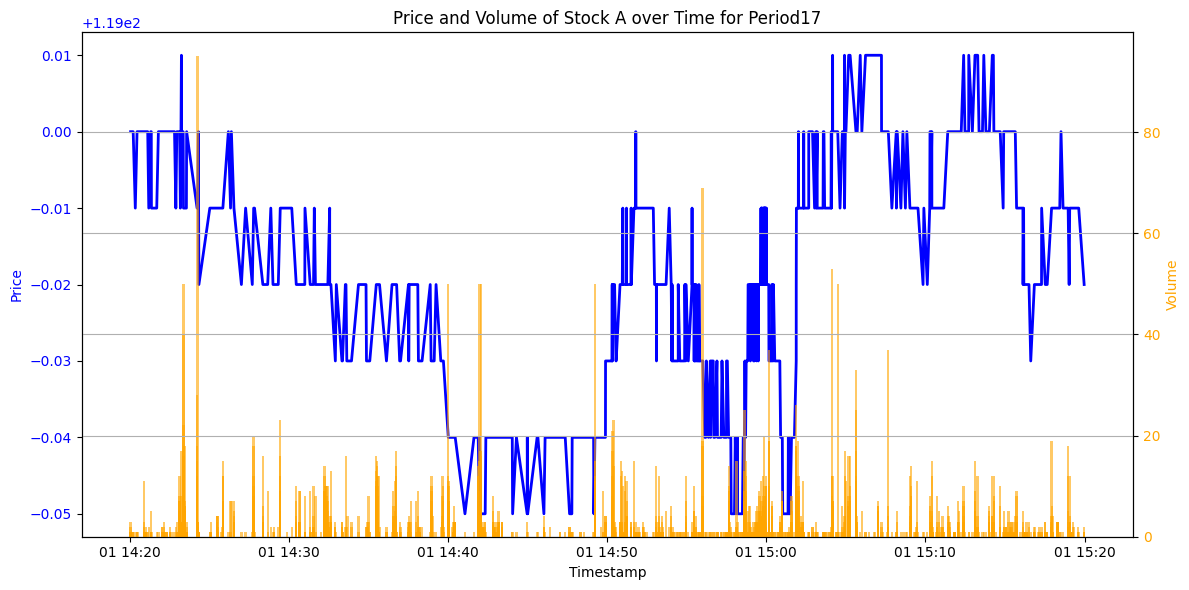

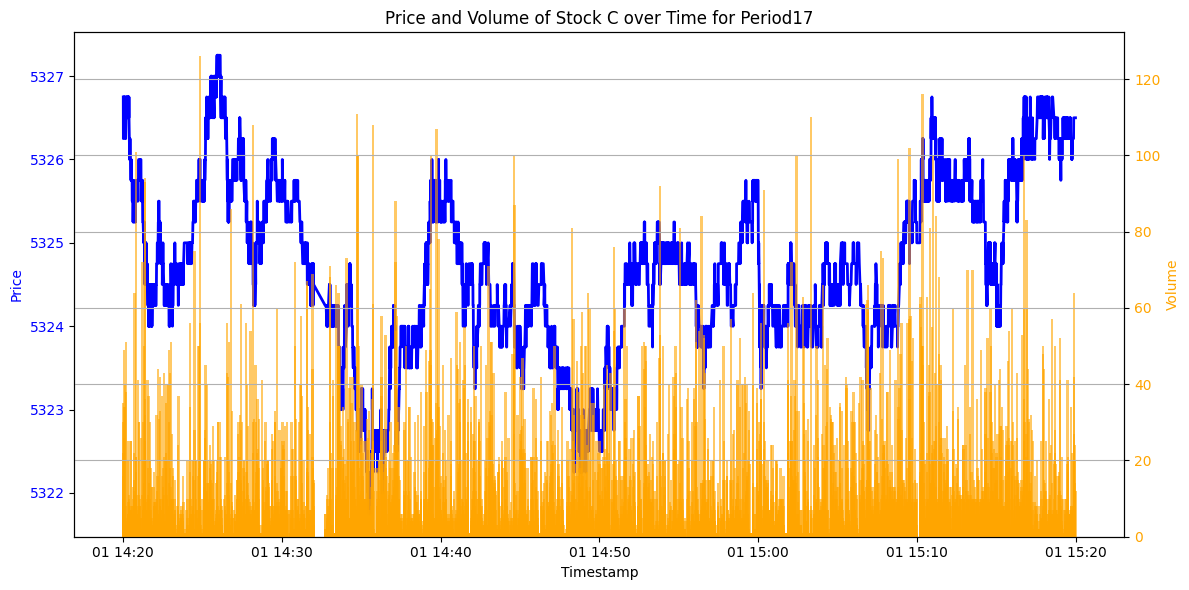

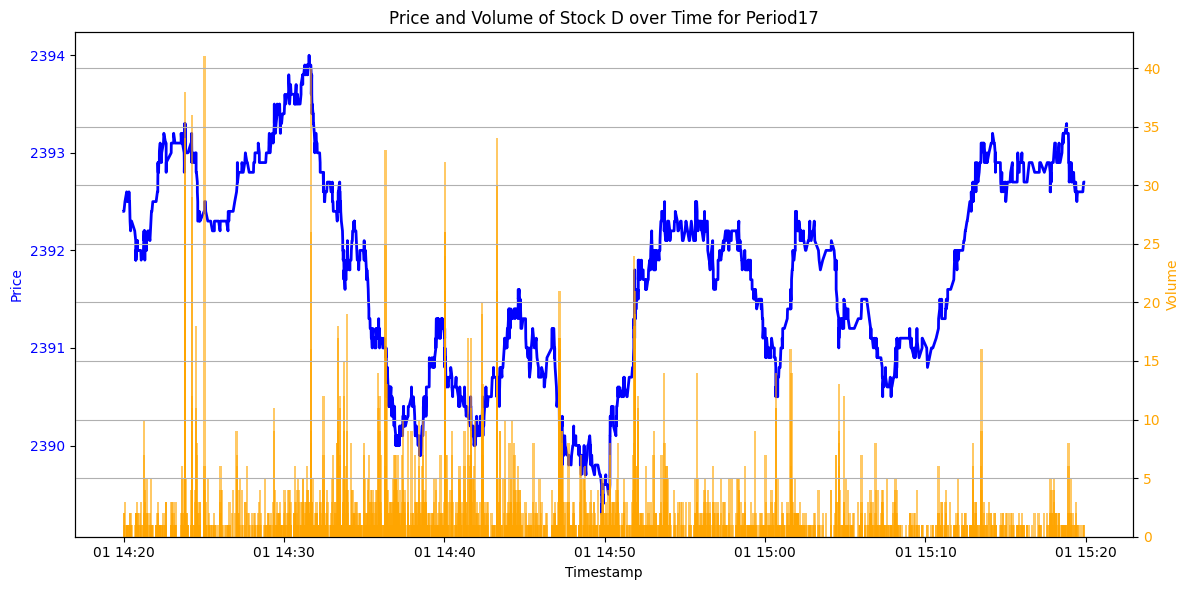

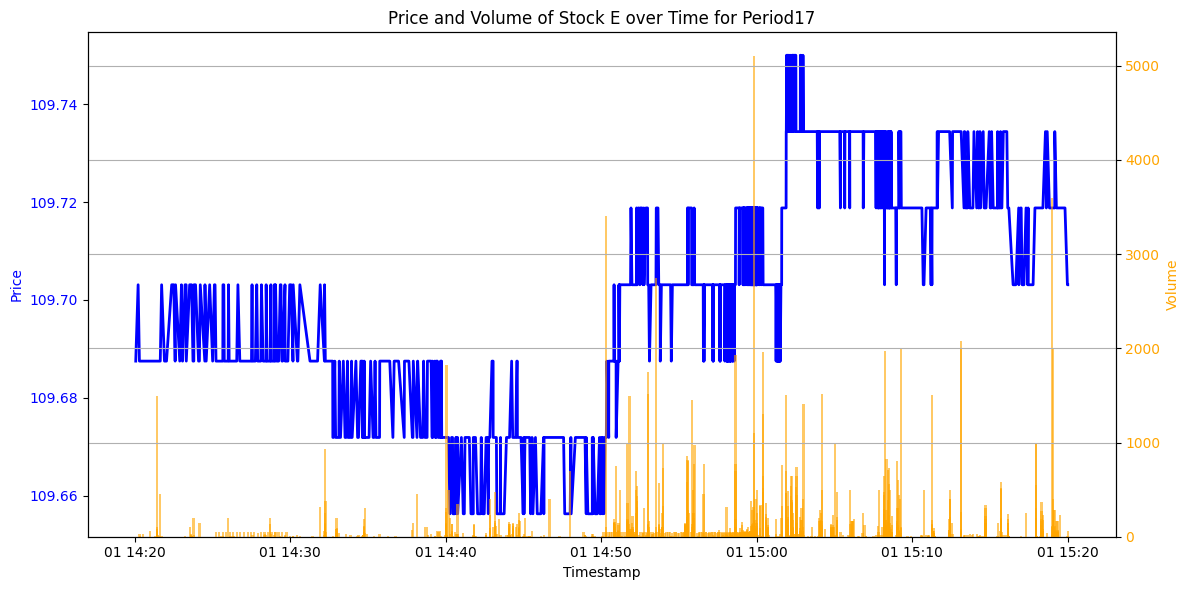

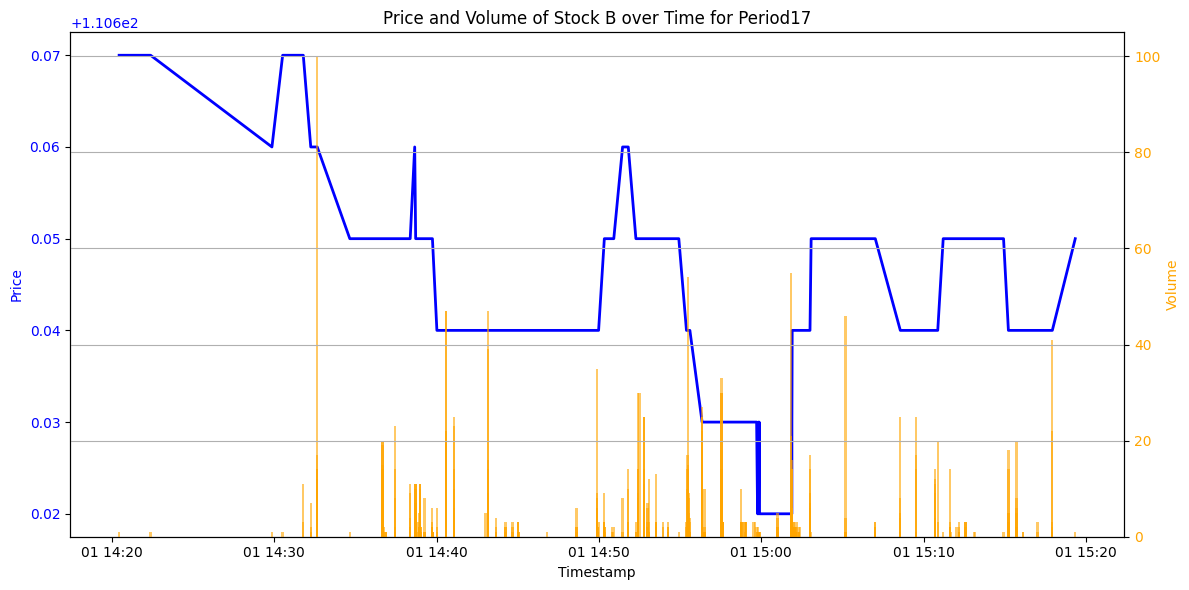

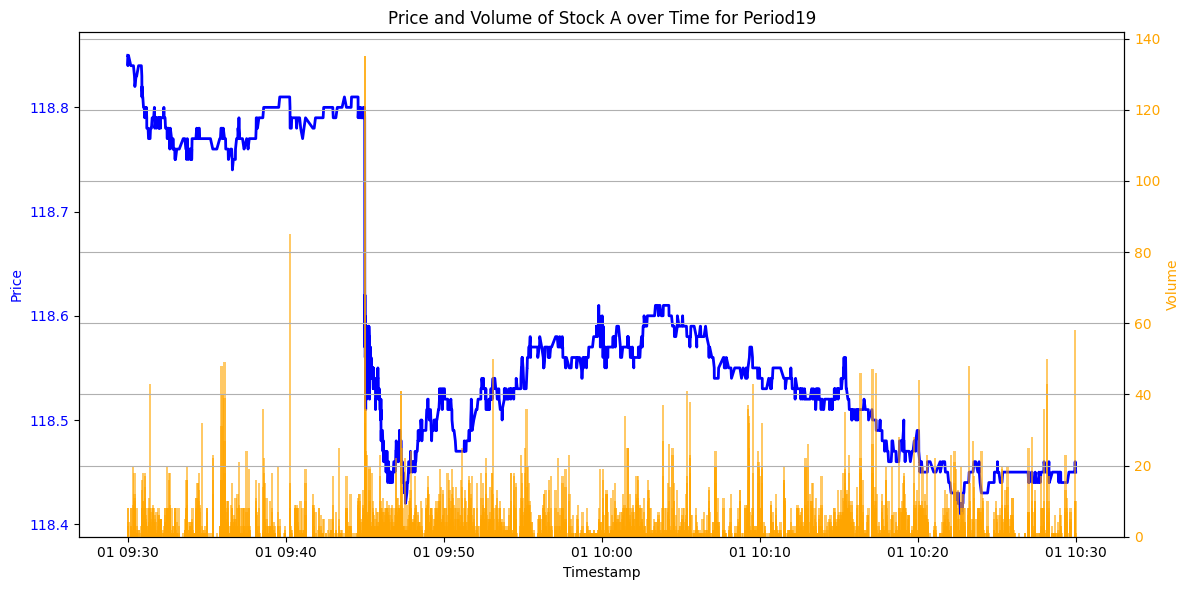

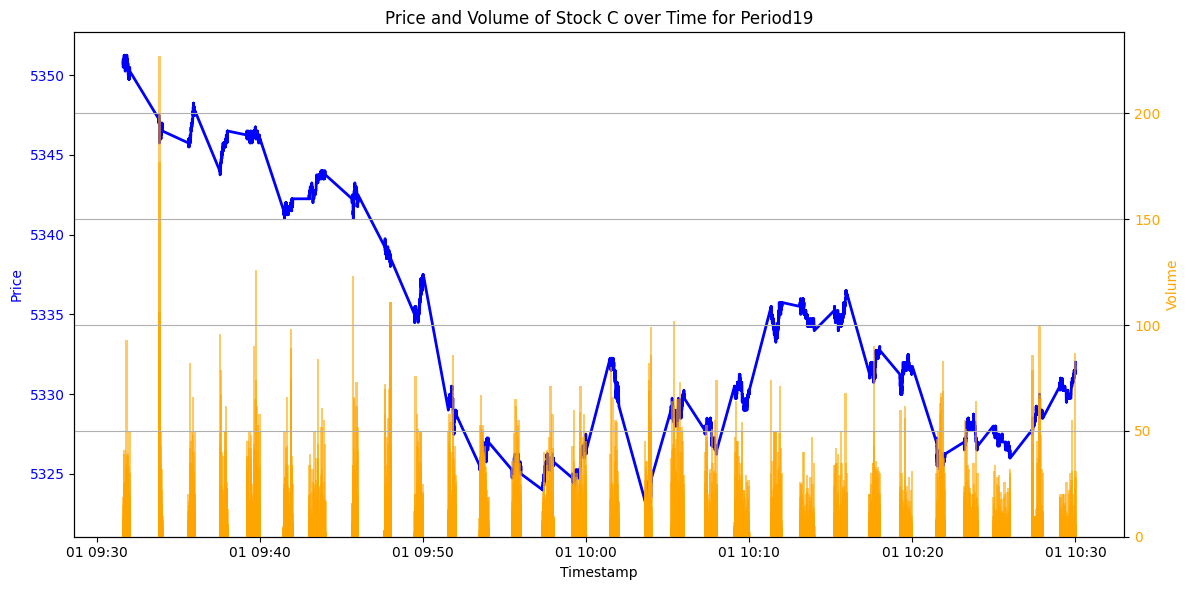

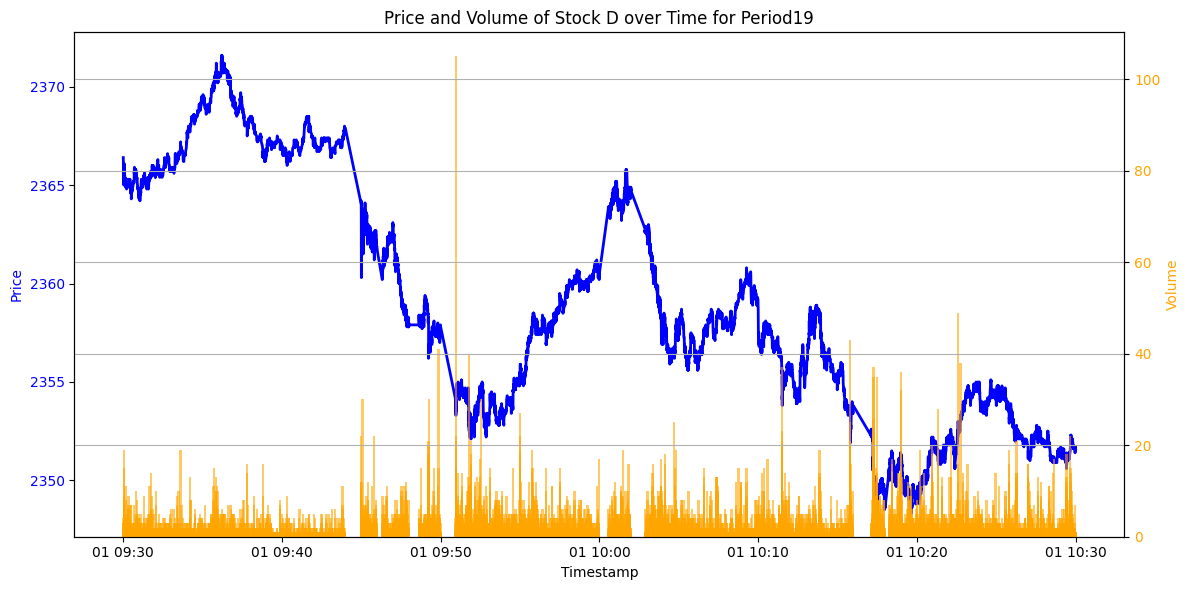

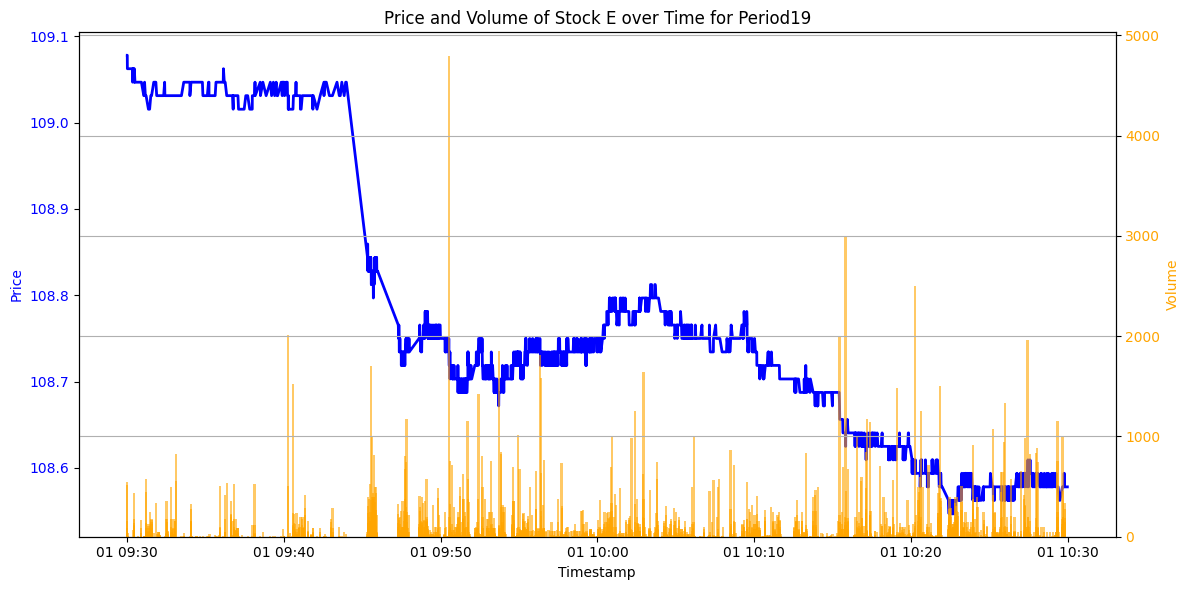

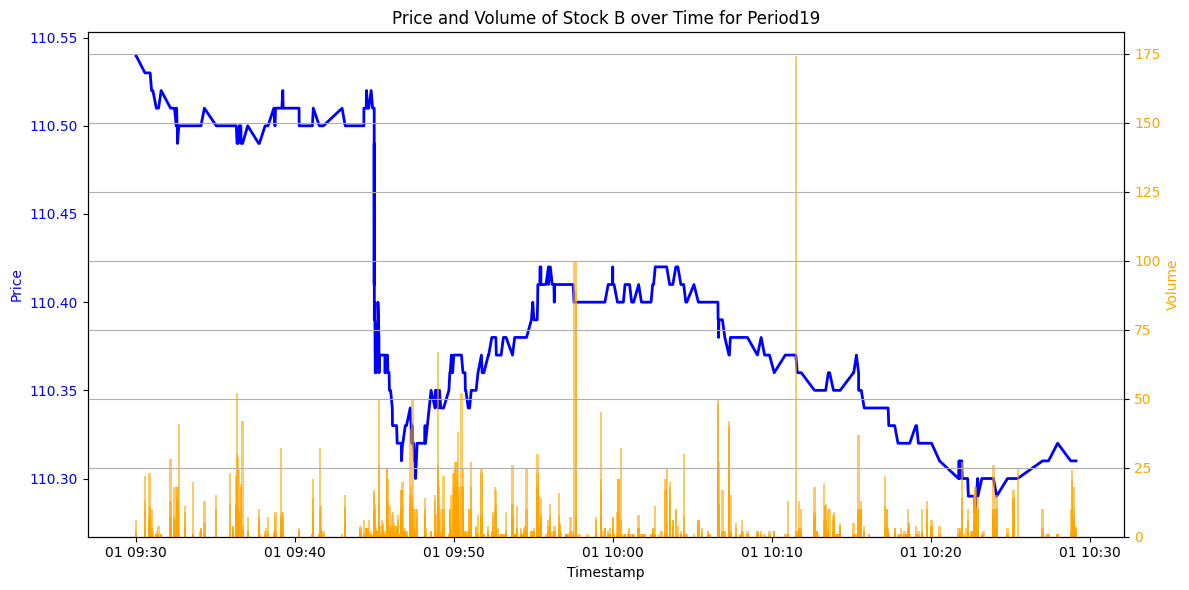

In [38]:
plot_price_and_volume_together(read_and_plot_data("../TestData")[0])

In [43]:
# Provide the root directory where the TrainingData folder resides
root_directory = "../TrainingData"
data, files = read_and_plot_data(root_directory)
all_combined_data = concat_numbered_files_all(root_directory)

In [44]:
all_combined_data['A', 'Period9']

,bidVolume,bidPrice,askVolume,askPrice,timestamp
0,72,118.60,31,118.61,10:00:00.006938892
1,72,118.60,30,118.61,10:00:00.007165388
2,72,118.60,31,118.61,10:00:00.062952624
3,72,118.60,41,118.61,10:00:00.081440852
4,72,118.60,48,118.61,10:00:00.081685387
...,...,...,...,...,...
56039,58,118.58,75,118.59,10:59:59.763673650
56040,58,118.58,66,118.59,10:59:59.763743474
56041,57,118.58,66,118.59,10:59:59.764891156
56042,58,118.58,66,118.59,10:59:59.867433591


In [59]:
data[('A', 'Period1')]

,price,volume,timestamp
0,117.41,3,08:10:00.004135304
1,117.41,1,08:10:00.138424619
2,117.42,1,08:10:00.243241245
3,117.42,1,08:10:00.243255344
4,117.42,5,08:10:00.243333885
...,...,...,...
11009,117.17,1,09:09:56.530785191
11010,117.17,4,09:09:56.531636173
11011,117.17,1,09:09:56.531886066
11012,117.17,1,09:09:56.556890453


# RNN Model

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=2, dropout=0.2, output_layer=1):
        """
        Initializes the RNN model with LSTM layers, dropout, and a dense output layer.
        
        Args:
            input_size (int): Number of features in the input.
            hidden_size (int): Number of units in the LSTM layers.
            num_layers (int): Number of LSTM layers.
            dropout (float): Dropout rate.
        """
        super(RNNModel, self).__init__()
        
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout,
            batch_first=True,
            bias=True
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, output_layer, bias=True)  # Output layer for binary classification
        self.sigmoid = nn.Sigmoid()  # Activation for binary output

    def forward(self, x):
        """
        Forward pass through the network.
        
        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, sequence_length, input_size).
            
        Returns:
            torch.Tensor: Output predictions of shape (batch_size, 1).
        """
        # Pass through LSTM layers
        out, (h_n, c_n) = self.lstm(x)
        
        # Use the output from the last LSTM layer
        out = self.dropout(h_n[-1])  # Take the output of the last LSTM layer
        out = self.fc(out)
        out = self.sigmoid(out)
        return out


## Data Preprocessing

In [41]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, recall_score, precision_score


class StockDataset(Dataset):
    """
    Custom PyTorch Dataset for stock data.
    """
    def __init__(self, df, sequence_length, features:list=None, target_feature:str=None):
        """
        Initializes the dataset with sequences and targets.
        
        Args:
            df (pd.DataFrame): Preprocessed DataFrame with features and target.
            sequence_length (int): Number of time steps in each sequence.
        """
        # features = []
        # for x in ['bidVolume', 'bidPrice', 'askVolume', 'askPrice', 'price']:
        #     for letter in ['A', 'B', 'C', 'D', 'E']:
        #         features.append(f"{x}_{letter}")

        self.sequence_length = sequence_length
        self.features = df[features].values
        self.target = df[target_feature].values

    def __len__(self):
        return len(self.features) - self.sequence_length

    def __getitem__(self, idx):
        """
        Gets a single sequence and its corresponding target value.
        
        Args:
            idx (int): Index for the starting point of the sequence.
        
        Returns:
            (torch.Tensor, torch.Tensor): A tuple containing the sequence and its target.
        """
        X = self.features[idx:idx + self.sequence_length]
        y = self.target[idx + self.sequence_length - 1]
        return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

from sklearn.preprocessing import MinMaxScaler

def add_target_column(df):
    """
    Adds a 'target' column to the DataFrame.
    1 if the next bidPrice is higher than the current bidPrice, otherwise 0.
    """
    df['target'] = (df['bidPrice'].shift(-1) > df['bidPrice']).astype(int)
    df.dropna(inplace=True)  # Drop the last row as it will have no target value
    return df

def preprocess_features(df:pd.DataFrame):
    """
    Scales numeric features using MinMaxScaler and returns the scaled data.
    """
    scaler = MinMaxScaler()
    features = ['bidVolume', 'bidPrice', 'askVolume', 'askPrice', 'price']
    df[features] = scaler.fit_transform(df[features])
    return df, scaler

def prepare_data_loader(df, sequence_length, batch_size):
    """
    Prepares a DataLoader for the given DataFrame.
    
    Args:
        df (pd.DataFrame): The input DataFrame containing the stock data.
        sequence_length (int): Number of time steps in each sequence.
        batch_size (int): Batch size for the DataLoader.
    
    Returns:
        DataLoader: PyTorch DataLoader for the dataset.
    """
    features = ['bidVolume', 'bidPrice', 'askVolume', 'askPrice', 'price']
    # for x in ['bidVolume', 'bidPrice', 'askVolume', 'askPrice', 'price']:
        # for letter in ['A', 'B', 'C', 'D', 'E']:
            # features.append(f"{x}_{letter}")

    scaler = MinMaxScaler()

    df[features] = scaler.fit_transform(df[features])

    # Add target column
    # for letter in ['A', 'B', 'C', 'D', 'E']:
        # df = add_target_column(df, f"bidPrice_{letter}")
        # df[f'target_{letter}'] = (df[f'price_{letter}'].shift(-1) > df[f'price_{letter}']).astype(int)

    df['target'] = (df['price'].shift(-1) > df['price']).astype(int)

    df.dropna(inplace=True)  # Drop rows with NaN values (last row)

    # targets = [f'target_{letter}' for letter in ['A', 'B', 'C', 'D', 'E']]

    # Create Dataset and DataLoader
    dataset = StockDataset(df, sequence_length, features=features, target_feature='target')
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    return data_loader, scaler

def train_model(model, epochs, criterion, optimizer, train_loader):
    loss_data = []
    loss_data_cummulative = []

    for epoch in range(epochs):
        model.train()
        losses = 0
        for batch in train_loader:  # Assume train_loader provides (X_batch, y_batch)
            X_batch, y_batch = batch
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(X_batch)
            
            # Compute loss
            # print(outputs.squeeze().shape, y_batch.shape)
            loss = criterion(outputs.squeeze(), y_batch)

            losses += loss.item()

            loss_data.append(loss.item())
            loss_data_cummulative.append(losses)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()
    
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {losses:.4f}")
    
    return loss_data, loss_data_cummulative

# Define a function to evaluate the model
def evaluate_model(model, test_loader, criterion):
    """
    Evaluate the RNN model.

    Args:
        model: The trained RNN model.
        test_loader: DataLoader for test data.
        criterion: Loss function.

    Returns:
        Accuracy and loss on the test dataset.
    """
    model.eval()
    all_predictions = []
    all_targets = []
    test_loss = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)
            test_loss += loss.item()

            # Store predictions and targets for accuracy calculation
            predictions = (outputs.squeeze() > 0.5).float()
            # print(predictions, outputs)

            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(y_batch.cpu().numpy())
    
    # Compute accuracy
    accuracy = accuracy_score(all_targets, all_predictions)
    recall = recall_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions)

    return accuracy, recall, precision, test_loss


In [42]:
import pandas as pd

def compute_row_aggregates_with_interval_(price_df, bid_ask_price_df, interval='1S'):
    """
    Aggregates price data and bid/ask price data, computes the mean for numeric features,
    and groups them by a constant time interval.

    Args:
        price_df (pd.DataFrame): DataFrame with price data and 'timestamp'.
        bid_ask_price_df (pd.DataFrame): DataFrame with bid/ask data and 'timestamp'.
        interval (str): Time interval for grouping (e.g., '15T' for 15 minutes).
 
    Returns:
        pd.DataFrame: Merged DataFrame with aggregated numeric values and timestamps.
    """
    # Ensure the timestamp column is in datetime format
    price_df['timestamp'] = pd.to_datetime(price_df['timestamp'], format='%H:%M:%S.%f')
    bid_ask_price_df['timestamp'] = pd.to_datetime(bid_ask_price_df['timestamp'], format='%H:%M:%S.%f')

    # Aggregate price data by interval
    price_aggregated = price_df.set_index('timestamp').resample(interval).agg(
        {
            'price': 'mean'
        }
    ).reset_index()

    # Aggregate bid/ask price data by interval
    bid_ask_aggregated = bid_ask_price_df.set_index('timestamp').resample(interval).agg(
        {
            'bidVolume': 'mean',
            'bidPrice': 'mean',
            'askVolume': 'mean',
            'askPrice': 'mean'
        }
    ).reset_index()

    # Merge aggregated price and bid/ask data on the timestamp
    merged_df = pd.merge_asof(
        price_aggregated.sort_values('timestamp'),
        bid_ask_aggregated.sort_values('timestamp'),
        on='timestamp',
        direction='nearest'  # Matches the nearest timestamps
    )

    # Generate a full range of timestamps from start to end with the specified interval
    full_range = pd.date_range(
        start=merged_df['timestamp'].min().floor('min'),
        end=merged_df['timestamp'].max().ceil('min'),
        freq=interval
    )

    # Reindex merged data to ensure all timestamps are included up to 59 seconds
    merged_df = merged_df.set_index('timestamp').reindex(full_range).reset_index()
    merged_df.rename(columns={'index': 'timestamp'}, inplace=True)

    # Forward-fill missing values to fill gaps
    # merged_df['timestamp'] = pd.to_datetime(price_df['timestamp'], format='%H:%M:%S.%f')
    merged_df.fillna(method='ffill', inplace=True)
    merged_df.fillna(method='bfill', inplace=True)

    return merged_df


def concat_dataframes_horizontally(df_dict):
    """
    Takes a dictionary of DataFrames, removes the 'timestamp' column from each,
    renames columns with a suffix based on the dictionary key, and concatenates them horizontally.

    Args:
        df_dict (dict): Dictionary where keys are strings and values are DataFrames with the same length.

    Returns:
        pd.DataFrame: Concatenated DataFrame with renamed columns.
    """
    processed_frames = []

    for key, df in df_dict.items():
        # Drop the 'timestamp' column
        df_no_timestamp = df.drop(columns=['timestamp'], errors='ignore')

        # Rename columns by appending the key as a suffix
        df_no_timestamp = df_no_timestamp.add_suffix(f"_{key}")

        # Add the processed DataFrame to the list
        processed_frames.append(df_no_timestamp)

    # Concatenate all DataFrames horizontally
    concatenated_df = pd.concat(processed_frames, axis=1)

    return concatenated_df


s = set()
for (letter, period) in data.keys():
    s.add(period)

s = list(s)

Combined = {}
for period in s:
    A = compute_row_aggregates_with_interval_(data[('A', period)], all_combined_data[('A', period)])
    B = compute_row_aggregates_with_interval_(data[('B', period)], all_combined_data[('B', period)])
    C = compute_row_aggregates_with_interval_(data[('C', period)], all_combined_data[('C', period)])
    D = compute_row_aggregates_with_interval_(data[('D', period)], all_combined_data[('D', period)])
    E = compute_row_aggregates_with_interval_(data[('E', period)], all_combined_data[('E', period)])
    Combined[period] = {'A': A, 'B': B, 'C': C, 'D': D, 'E': E}


['Period8', 'Period9', 'Period6', 'Period15', 'Period13', 'Period14', 'Period4', 'Period2', 'Period11', 'Period10', 'Period3', 'Period1', 'Period12', 'Period7', 'Period5']


/var/folders/66/lykx91p150q4wl3w7w5ypwdh0000gn/T/ipykernel_38740/3776542974.py:21: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  price_aggregated = price_df.set_index('timestamp').resample(interval).agg(
/var/folders/66/lykx91p150q4wl3w7w5ypwdh0000gn/T/ipykernel_38740/3776542974.py:28: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  bid_ask_aggregated = bid_ask_price_df.set_index('timestamp').resample(interval).agg(
/var/folders/66/lykx91p150q4wl3w7w5ypwdh0000gn/T/ipykernel_38740/3776542974.py:46: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.date_range(
/var/folders/66/lykx91p150q4wl3w7w5ypwdh0000gn/T/ipykernel_38740/3776542974.py:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=T

In [45]:
Combined['Period1']['A']

,timestamp,price,bidVolume,bidPrice,askVolume,askPrice
0,1900-01-01 08:10:00,117.415714,71.240741,117.410000,24.574074,117.420000
1,1900-01-01 08:10:01,117.415714,67.000000,117.410000,39.600000,117.420000
2,1900-01-01 08:10:02,117.415714,68.500000,117.410000,39.000000,117.420000
3,1900-01-01 08:10:03,117.415714,70.000000,117.410000,40.500000,117.420000
4,1900-01-01 08:10:04,117.415714,70.000000,117.410000,40.500000,117.420000
...,...,...,...,...,...,...
3596,1900-01-01 09:09:56,117.175000,32.866667,117.169333,36.400000,117.179524
3597,1900-01-01 09:09:57,117.175000,26.000000,117.170000,50.909091,117.180000
3598,1900-01-01 09:09:58,117.170000,23.033333,117.168000,60.100000,117.180000
3599,1900-01-01 09:09:59,117.170000,23.033333,117.168000,60.100000,117.180000


In [46]:
Combined['Period1']['B']

,timestamp,price,bidVolume,bidPrice,askVolume,askPrice
0,1900-01-01 08:10:00,109.79,117.527778,109.782778,35.638889,109.793611
1,1900-01-01 08:10:01,109.79,117.527778,109.782778,35.638889,109.793611
2,1900-01-01 08:10:02,109.79,117.527778,109.782778,35.638889,109.793611
3,1900-01-01 08:10:03,109.79,117.527778,109.782778,35.638889,109.793611
4,1900-01-01 08:10:04,109.79,117.527778,109.782778,35.638889,109.793611
...,...,...,...,...,...,...
3596,1900-01-01 09:09:56,109.71,44.954545,109.707727,123.522727,109.719318
3597,1900-01-01 09:09:57,109.71,19.700000,109.710000,137.000000,109.720000
3598,1900-01-01 09:09:58,109.71,39.909091,109.707273,137.787879,109.720000
3599,1900-01-01 09:09:59,109.71,39.909091,109.707273,137.787879,109.720000


## Training loop

We decided to only train on stock A due to time and compute contraints. But other stocks would work 

In [47]:
from sklearn.model_selection import train_test_split
from torch.utils.data import ConcatDataset, DataLoader

def train_model_for_stock_period(Combined, stock, period):
    # Example configuration
    input_size = 5  # Number of features in the input (e.g., bidVolume, bidPrice, etc.)
    sequence_length = 20  # Number of time steps in each sequence
    batch_size = 32
    hidden_size = 50
    num_layers = 2
    dropout = 0.2
    learning_rate = 0.0001
    epochs = 15

    # Initialize the model
    model = RNNModel(input_size, hidden_size, num_layers, dropout, output_layer=1)

    # Define loss function and optimizer
    criterion = nn.BCELoss()  # Binary cross-entropy loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loader, scaler = prepare_data_loader(Combined[period][stock], sequence_length, batch_size)

    train_model(model, epochs, criterion, optimizer, train_loader)

    return model, scaler


In [48]:

models = []
stocks = ['A', 'B', 'C', 'D', 'E']

for stock in stocks:
    model, scaler = train_model_for_stock_period(Combined, 'A', 'Period1')
    models.append((model, scaler))
    break

precisions = {}
for i, (model, scalar) in enumerate(models):
    for period in Combined.keys():
        if period == 'Period1':
            continue
            
        test_loader, scaler = prepare_data_loader(Combined[period][stocks[i]], 20, 32)
        test_accuracy, test_recall, test_precision, test_loss = evaluate_model(model, test_loader, criterion=nn.BCELoss()  )
        # print(f"Stock {stocks[i]}, {period}, Test Accuracy: {test_accuracy}")
        
        precisions[(period, stock[i])] = test_accuracy
    
for period, stock in precisions.keys():
    precision = precisions[(period, stock)]
    print(f"{period}, {stock}, Test Accuracy: {precision}")
    

Epoch [1/15], Loss: 68.3683
Epoch [2/15], Loss: 43.6355
Epoch [3/15], Loss: 40.8283
Epoch [4/15], Loss: 40.8004
Epoch [5/15], Loss: 40.8038
Epoch [6/15], Loss: 40.8340
Epoch [7/15], Loss: 40.6837
Epoch [8/15], Loss: 40.8342
Epoch [9/15], Loss: 40.6442
Epoch [10/15], Loss: 40.6584
Epoch [11/15], Loss: 40.4180
Epoch [12/15], Loss: 40.5741
Epoch [13/15], Loss: 40.3774
Epoch [14/15], Loss: 40.6454
Epoch [15/15], Loss: 40.6470


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Period8, A, Test Accuracy: 0.9279530857302429
Period9, A, Test Accuracy: 0.919575537559341
Period6, A, Test Accuracy: 0.8413850879642558
Period15, A, Test Accuracy: 0.893325886623848
Period13, A, Test Accuracy: 0.8975146607092991
Period14, A, Test Accuracy: 0.9388438983524156
Period4, A, Test Accuracy: 0.9134320022340129
Period2, A, Test Accuracy: 0.8975146607092991
Period11, A, Test Accuracy: 0.9410779111979893
Period10, A, Test Accuracy: 0.967606813739179
Period3, A, Test Accuracy: 0.919575537559341
Period12, A, Test Accuracy: 0.9670483105277855
Period7, A, Test Accuracy: 0.9053337056688076
Period5, A, Test Accuracy: 0.9153867634738899


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
precisions

{('Period8', 'A'): 0.9279530857302429,
 ('Period9', 'A'): 0.919575537559341,
 ('Period6', 'A'): 0.8413850879642558,
 ('Period15', 'A'): 0.893325886623848,
 ('Period13', 'A'): 0.8975146607092991,
 ('Period14', 'A'): 0.9388438983524156,
 ('Period4', 'A'): 0.9134320022340129,
 ('Period2', 'A'): 0.8975146607092991,
 ('Period11', 'A'): 0.9410779111979893,
 ('Period10', 'A'): 0.967606813739179,
 ('Period3', 'A'): 0.919575537559341,
 ('Period12', 'A'): 0.9670483105277855,
 ('Period7', 'A'): 0.9053337056688076,
 ('Period5', 'A'): 0.9153867634738899}

## Test Data

It looked at the stock A (but other stocks would work), for the sake of performance and time constraints.

In [54]:
# Provide the root directory where the TrainingData folder resides
root_directory = "../TestData"
test_data, files = read_and_plot_data(root_directory)
all_combined_test_data = concat_numbered_files_all(root_directory)
all_combined_test_data 

s = set()
for (letter, period) in test_data.keys():
    s.add(period)

s = list(s)

Test_Combined = {}
for period in s:
    A = compute_row_aggregates_with_interval_(test_data[('A', period)], all_combined_test_data[('A', period)])
    B = compute_row_aggregates_with_interval_(test_data[('B', period)], all_combined_test_data[('B', period)])
    C = compute_row_aggregates_with_interval_(test_data[('C', period)], all_combined_test_data[('C', period)])
    D = compute_row_aggregates_with_interval_(test_data[('D', period)], all_combined_test_data[('D', period)])
    E = compute_row_aggregates_with_interval_(test_data[('E', period)], all_combined_test_data[('E', period)])
    Test_Combined[period] = {'A': A, 'B': B, 'C': C, 'D': D, 'E': E}


test_precisions = {}
for i, (model, scalar) in enumerate(models):
    for period in Test_Combined.keys():
        test_loader, scaler = prepare_data_loader(Test_Combined[period][stocks[i]], 20, 32)
        test_accuracy, test_recall, test_precision, test_loss = evaluate_model(model, test_loader, criterion=nn.BCELoss()  )
        print(f"Stock {stocks[i]}, {period}, Test Accuracy: {test_accuracy}")
        
        test_precisions[(period, stocks[i])] = test_accuracy

for period, stock in test_precisions.keys():
    precision = test_precisions[(period, stock)]
    print(f"{period}, {stock}, Test Accuracy: {precision}")
    

/var/folders/66/lykx91p150q4wl3w7w5ypwdh0000gn/T/ipykernel_38740/3776542974.py:21: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  price_aggregated = price_df.set_index('timestamp').resample(interval).agg(
/var/folders/66/lykx91p150q4wl3w7w5ypwdh0000gn/T/ipykernel_38740/3776542974.py:28: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  bid_ask_aggregated = bid_ask_price_df.set_index('timestamp').resample(interval).agg(
/var/folders/66/lykx91p150q4wl3w7w5ypwdh0000gn/T/ipykernel_38740/3776542974.py:46: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.date_range(
/var/folders/66/lykx91p150q4wl3w7w5ypwdh0000gn/T/ipykernel_38740/3776542974.py:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=T

Stock A, Period16, Test Accuracy: 0.8966769058922088


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Stock A, Period18, Test Accuracy: 0.8642837196313878


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Stock A, Period19, Test Accuracy: 0.8980731639206926


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Stock A, Period17, Test Accuracy: 0.9581122591454901
Stock A, Period20, Test Accuracy: 0.9625802848366378
Period16, A, Test Accuracy: 0.8966769058922088
Period18, A, Test Accuracy: 0.8642837196313878
Period19, A, Test Accuracy: 0.8980731639206926
Period17, A, Test Accuracy: 0.9581122591454901
Period20, A, Test Accuracy: 0.9625802848366378


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
test_precisions

{('Period16', 'A'): 0.8966769058922088,
 ('Period18', 'A'): 0.8642837196313878,
 ('Period19', 'A'): 0.8980731639206926,
 ('Period17', 'A'): 0.9581122591454901,
 ('Period20', 'A'): 0.9625802848366378}